In [243]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
#from funkcje import *
from time_transformations import *

hours=np.arange(24)
hours-=2
hours[0]+=24
hours[1]+=24
print(hours)

jul=julday(2022,7,1,hours)
jul[0]=julday(2022,6,30,22)
jul[1]=julday(2022,6,30,23)
print(jul)


[22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[2459761.41666667 2459761.45833333 2459761.5        2459761.54166667
 2459761.58333333 2459761.625      2459761.66666667 2459761.70833333
 2459761.75       2459761.79166667 2459761.83333333 2459761.875
 2459761.91666667 2459761.95833333 2459762.         2459762.04166667
 2459762.08333333 2459762.125      2459762.16666667 2459762.20833333
 2459762.25       2459762.29166667 2459762.33333333 2459762.375     ]


In [244]:
gmst=GMST(jul)
print(gmst)

[16.59667239 17.5994103  18.60214821 19.60488611 20.60762403 21.61036194
 22.61309984 23.61583776  0.61857566  1.62131357  2.62405149  3.62678939
  4.6295273   5.63226521  6.63500312  7.63774103  8.64047894  9.64321685
 10.64595475 11.64869267 12.65143058 13.65416848 14.6569064  15.6596443 ]


In [245]:
l=21
lst=gmst+l/15
for n in range(len(lst)):
    if lst[n]>=24:
        lst[n]-=24
lst*=15
print(lst)

[2.69950086e+02 2.84991155e+02 3.00032223e+02 3.15073292e+02
 3.30114360e+02 3.45155429e+02 1.96497628e-01 1.52375664e+01
 3.02786350e+01 4.53197036e+01 6.03607723e+01 7.54018409e+01
 9.04429095e+01 1.05483978e+02 1.20525047e+02 1.35566115e+02
 1.50607184e+02 1.65648253e+02 1.80689321e+02 1.95730390e+02
 2.10771459e+02 2.25812527e+02 2.40853596e+02 2.55894665e+02]


In [246]:
#dane do zadania gwiazda nr 15
alfa=[11,5,5.885]
delta=[61,37,43.980]
fi1=52
fi2=0

lstrad=np.deg2rad(lst)

def katgodzinny(alfa):
    alfarad=hms2rad(alfa)
    trad=lstrad-alfarad

    for n in range(len(trad)):
        if trad[n] < 0:
            trad[n]+=2*np.pi
    return trad  
    
t=katgodzinny(alfa)

In [247]:
def wysokosc(fi, delta, trad):
    h=[]
    firad=np.deg2rad(fi)
    deltarad=dms2rad(delta)
    for z in trad:
        h.append(asin(sin(firad)*sin(deltarad)+cos(firad)*cos(deltarad)*cos(z)))
    return h
    

def azymut(fi, delta, trad):
    az=[]
    firad=np.deg2rad(fi)
    deltarad=dms2rad(delta)
    for z in trad:
        az.append(atan2((-cos(deltarad)*sin(z)),(cos(firad)*sin(deltarad)-sin(firad)*cos(deltarad)*cos(z))))
    return az




In [248]:
hWar=wysokosc(fi1,delta,t)
hR=wysokosc(fi2,delta,t)

azWar=azymut(fi1,delta,t)
azR=azymut(fi2,delta,t)

#wysokość Warszawa
print(hWar)

[0.674101371227257, 0.5857173345713929, 0.5132723092335179, 0.45908432879729805, 0.425054403228631, 0.4124627211398021, 0.4218016015343981, 0.4527049073283334, 0.5040008760247889, 0.573868096675708, 0.6600381367798873, 0.7599782519228382, 0.870994264594752, 0.9901843259747635, 1.114072703612954, 1.2372573656790529, 1.3469118457673654, 1.4026361611208304, 1.3545140862372826, 1.247191277164713, 1.1244587525195533, 1.0003771968893078, 0.880650133276812, 0.7688384851599761]


In [249]:
#wysokość równik
print(hR)

[-0.11258169377840682, -0.23034552496844063, -0.33486302403748036, -0.4185623342765923, -0.47395075065919284, -0.49506639252724344, -0.479371860325476, -0.42876829780821896, -0.34882381442335225, -0.24691622830927018, -0.13066125837539191, -0.007237326490805864, 0.1165750205354227, 0.23402015764721534, 0.33797750046929337, 0.4208644475963115, 0.47521066113277727, 0.49513713799241454, 0.4782446659088108, 0.4265763009891294, 0.34579067307342126, 0.24329387470348696, 0.1266931008559378, 0.003150307848017111]


In [250]:
#azymut Warszawa
print(azWar)

[-0.6322659772612429, -0.5237079584136975, -0.4049535480376217, -0.278170926245792, -0.1456866034003579, -0.010130282679746238, 0.12564218354496468, 0.25875740324048646, 0.38654277030732187, 0.5066296260697952, 0.6168461527959795, 0.7148185095768957, 0.7971096518440693, 0.8573599652609519, 0.8816612582930186, 0.8348532941689968, 0.6162559618166088, 0.031037245301677088, -0.5838242118893946, -0.8254415191850801, -0.8812356743615997, -0.8610392937244007, -0.8030906969657311, -0.722330812000819]


In [251]:
#azymut równik
print(azR)  

[-0.4832403111937456, -0.4423254999242452, -0.3719081930279922, -0.27279418009810846, -0.1491907459988591, -0.010547041476953947, 0.12921150059664352, 0.2557867196004498, 0.35892481832675815, 0.4337186557039187, 0.47900725191821714, 0.4951209002795503, 0.48236358089296977, 0.4404866471010642, 0.3691042562389578, 0.26909598780185867, 0.14481947825418912, 0.00590276187881585, -0.13363798574754038, -0.25957787465322296, -0.3618383639325483, -0.43567007965959564, -0.47999469792139626, -0.49516020968290786]


In [242]:
azWar=np.rad2deg(azWar)
azR=np.rad2deg(azR)
hWar=np.rad2deg(hWar)
hR=np.rad2deg(hR)

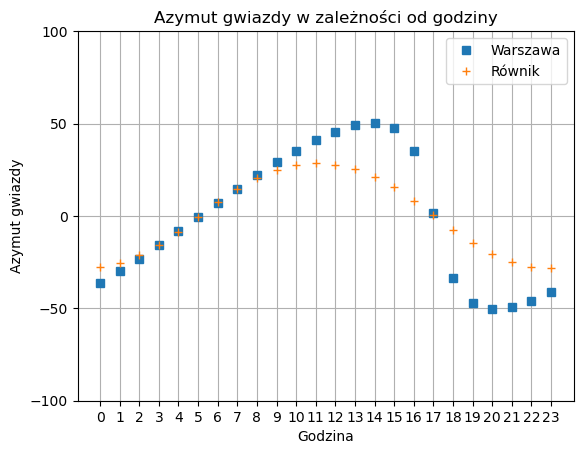

In [230]:
plt.plot(np.arange(24),azWar,'s',label='Warszawa')
plt.plot(np.arange(24),azR,'+',label='Równik')
plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(-100, 101, 50.0))
plt.title('Azymut gwiazdy w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Azymut gwiazdy')
plt.legend()
plt.grid()
plt.show()

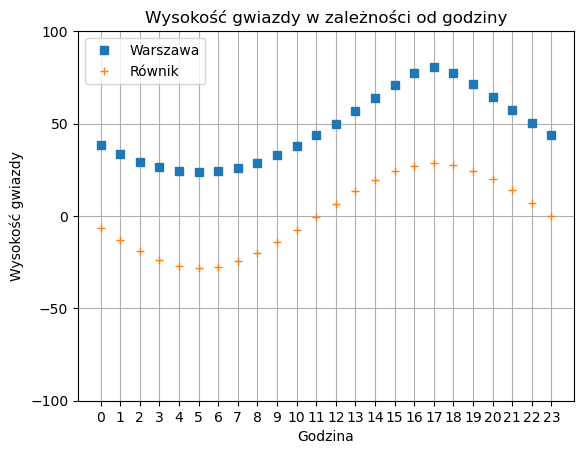

In [231]:
plt.plot(np.arange(24),hWar,'s',label='Warszawa')
plt.plot(np.arange(24),hR,'+',label='Równik')
plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(-100, 101, 50.0))
plt.title('Wysokość gwiazdy w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Wysokość gwiazdy')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Wykres Skyplot')

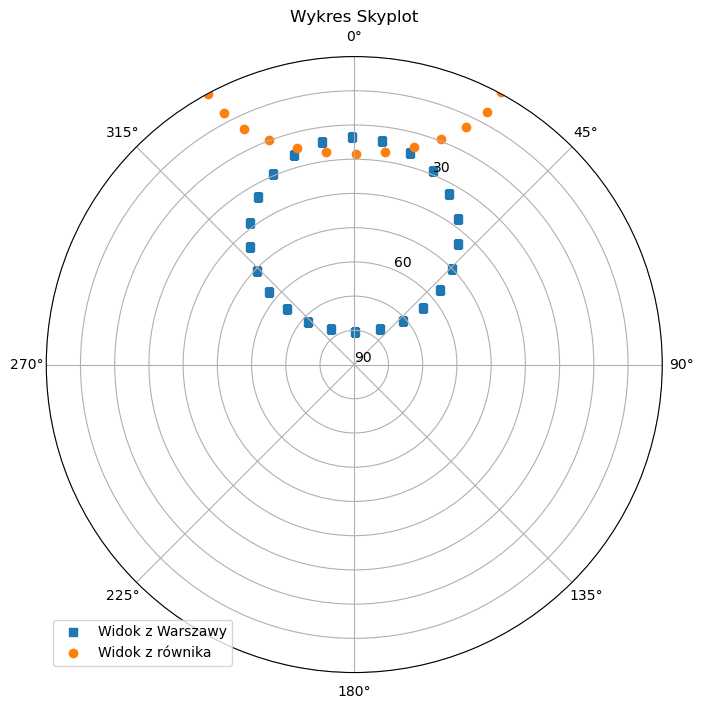

In [252]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') 
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10))                   

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

ax.scatter(azWar, 90-np.rad2deg(hWar), marker='s', label='Widok z Warszawy')
ax.scatter(azR, 90-np.rad2deg(hR), marker='o', label='Widok z równika')
plt.legend()
plt.title('Wykres Skyplot')

In [253]:
hWar.append(hWar[0])
hR.append(hR[0])
azWar.append(azWar[0])
azR.append(azR[0])

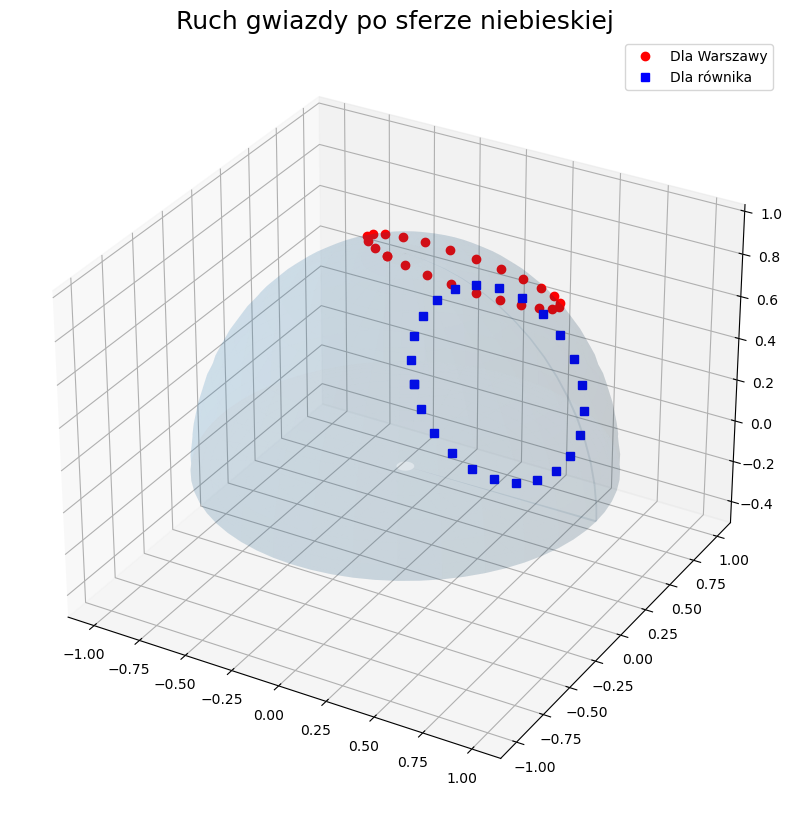

In [254]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
# promień Ziemi
r = 1
# siatka wspołrzędnych
u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
z[z<0] = 0		# bez tego, narysowalibyśmy całą kulę, a chcemy tylko półkulę
ax.plot_surface(x,y,z, alpha = 0.1)
ax.set_title('Ruch gwiazdy po sferze niebieskiej', size=18)


# narysowanie punktu na sferze
gx = r * np.sin(azWar) * np.cos(hWar)
gy = r * np.cos(azWar) * np.cos(hWar)
gz = r * np.sin(hWar)
ax.plot3D(gx,gy,gz, marker='o', color='red', linestyle='none', label='Dla Warszawy')

fx = r * np.sin(azR) * np.cos(hR)
fy = r * np.cos(azR) * np.cos(hR)
fz = r * np.sin(hR)
ax.plot3D(fx,fy,fz, marker='s', color='blue',linestyle='none', label='Dla równika')
plt.legend()

In [217]:
#slonce
alfaS=[6,38,47.274]
deltaS=[23,7,14.78]
tS=katgodzinny(alfaS)
hSWar=wysokosc(fi1,deltaS,tS)
hSR=wysokosc(fi2,deltaS,tS)
azSWar=azymut(fi1,deltaS,tS)
azSR=azymut(fi2,deltaS,tS)

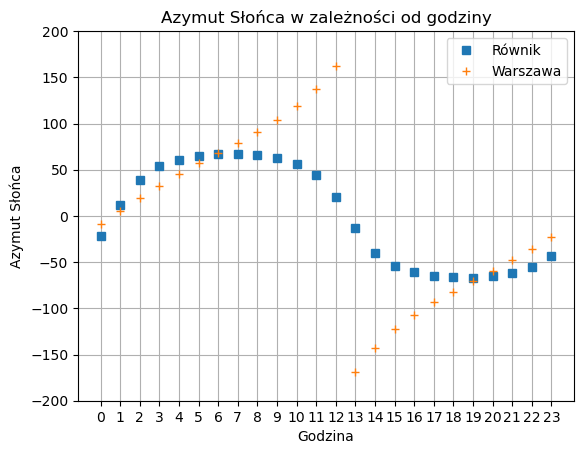

In [218]:
azSWar=np.rad2deg(azSWar)
azSR=np.rad2deg(azSR)
hSWar=np.rad2deg(hSWar)
hSR=np.rad2deg(hSR)

plt.plot(np.arange(24), azSR, 's', label='Równik')
plt.plot(np.arange(24), azSWar, '+', label='Warszawa')
plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(-200, 201, 50.0))
plt.title('Azymut Słońca w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Azymut Słońca')
plt.legend()
plt.grid()
plt.show()

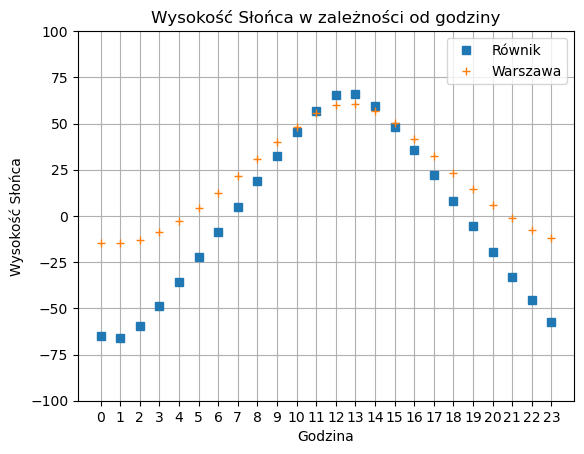

In [219]:
plt.plot(np.arange(24), hSR, 's', label = 'Równik')
plt.plot(np.arange(24), hSWar, '+', label = 'Warszawa')
plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(-100, 101, 25.0))
plt.title('Wysokość Słońca w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Wysokość Słońca')
plt.legend()
plt.grid()
plt.show()

In [172]:
hSWar.append(hSWar[0])
hSR.append(hSR[0])
azSWar.append(azSWar[0])
azSR.append(azSR[0])

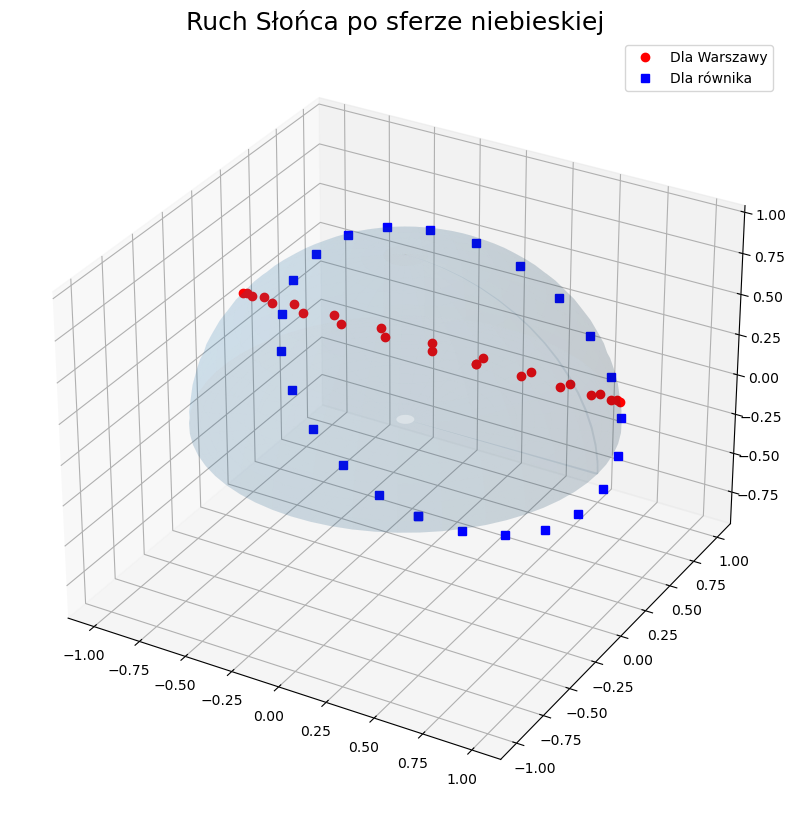

In [173]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
# promień Ziemi
r = 1
# siatka wspołrzędnych
u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
z[z<0] = 0		# bez tego, narysowalibyśmy całą kulę, a chcemy tylko półkulę
ax.plot_surface(x,y,z, alpha = 0.1)
ax.set_title('Ruch Słońca po sferze niebieskiej', size=18)


# narysowanie punktu na sferze
gx = r * np.sin(azSWar) * np.cos(hSWar)
gy = r * np.cos(azSWar) * np.cos(hSWar)
gz = r * np.sin(hSWar)
ax.plot3D(gx,gy,gz, marker='o', color='red', linestyle='none', label='Dla Warszawy')

fx = r * np.sin(azSR) * np.cos(hSR)
fy = r * np.cos(azSR) * np.cos(hSR)
fz = r * np.sin(hSR)
ax.plot3D(fx,fy,fz, marker='s', color='blue',linestyle='none', label='Dla równika')
plt.legend()

Text(0.5, 1.0, 'Wykres Skyplot')

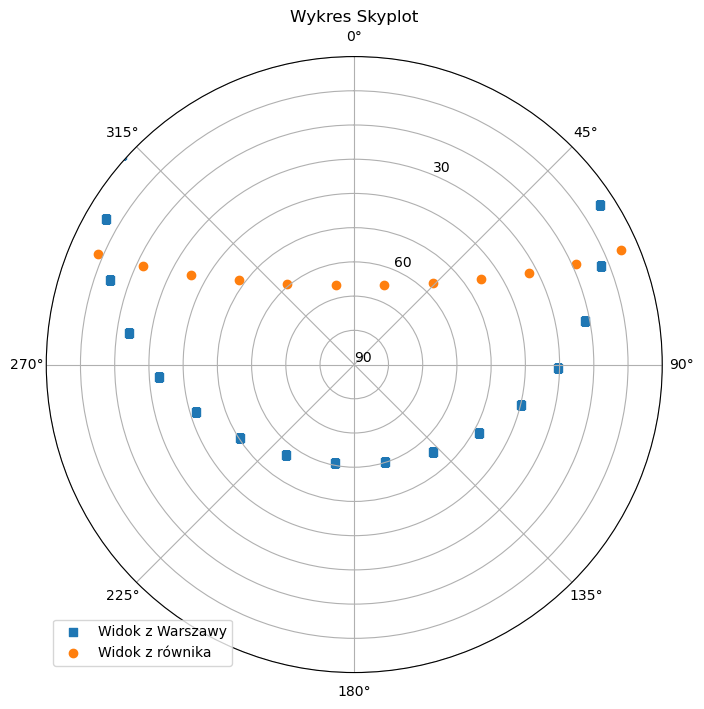

In [174]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') 
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10))                   

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

ax.scatter(azSWar, 90-np.rad2deg(hSWar), marker='s', label='Widok z Warszawy')
ax.scatter(azSR, 90-np.rad2deg(hSR), marker='o', label='Widok z równika')
plt.legend()
plt.title('Wykres Skyplot')

In [175]:
alfa1=[13,23,49.671]
delta1=[54,48,30.200]
t1=katgodzinny(alfa1)
hWar1=wysokosc(fi1,delta1,t1)
hR1=wysokosc(fi2,delta1,t1)
azWar1=azymut(fi1,delta1,t1)
azR1=azymut(fi2,delta1,t1)

alfa2=[11,55,0.263]
delta2=[53,34,10.580]
t2=katgodzinny(alfa2)
hWar2=wysokosc(fi1,delta2,t2)
hR2=wysokosc(fi2,delta2,t2)
azWar2=azymut(fi1,delta2,t2)
azR2=azymut(fi2,delta2,t2)

alfa3=[13,48,25.503]
delta3=[49,12,5.890]
t3=katgodzinny(alfa3)
hWar3=wysokosc(fi1,delta3,t3)
hR3=wysokosc(fi2,delta3,t3)
azWar3=azymut(fi1,delta3,t3)
azR3=azymut(fi2,delta3,t3)

alfa4=[12,16,31.815]
delta4=[56,54,27.780]
t4=katgodzinny(alfa4)
hWar4=wysokosc(fi1,delta4,t4)
hR4=wysokosc(fi2,delta4,t4)
azWar4=azymut(fi1,delta4,t4)
azR4=azymut(fi2,delta4,t4)

alfa5=[11,5,5.885]
delta5=[61,37,43.980]
t5=katgodzinny(alfa5)
hWar5=wysokosc(fi1,delta5,t5)
hR5=wysokosc(fi2,delta5,t5)
azWar5=azymut(fi1,delta5,t5)
azR5=azymut(fi2,delta5,t5)

alfa6=[12,55,0.774]
delta6=[55,50,17.090]
t6=katgodzinny(alfa6)
hWar6=wysokosc(fi1,delta6,t6)
hR6=wysokosc(fi2,delta6,t6)
azWar6=azymut(fi1,delta6,t6)
azR6=azymut(fi2,delta6,t6)

alfa7=[11,3,11.093]
delta7=[56,15,40.580]
t7=katgodzinny(alfa7)
hWar7=wysokosc(fi1,delta7,t7)
hR7=wysokosc(fi2,delta7,t7)
azWar7=azymut(fi1,delta7,t7)
azR7=azymut(fi2,delta7,t7)

Text(0.5, 1.0, 'Wykres Skyplot dla Wielkiego Wozu z Warszawy')

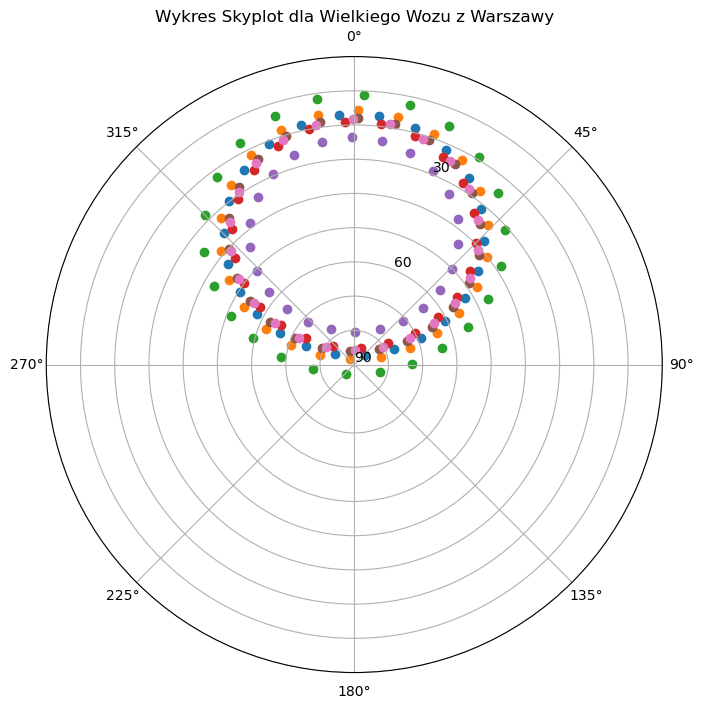

In [176]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10))                   # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

# narysowanie punktu na wykresie 
ax.scatter(azWar1, 90-np.rad2deg(hWar1))
ax.scatter(azWar2, 90-np.rad2deg(hWar2))
ax.scatter(azWar3, 90-np.rad2deg(hWar3))
ax.scatter(azWar4, 90-np.rad2deg(hWar4))
ax.scatter(azWar5, 90-np.rad2deg(hWar5))
ax.scatter(azWar6, 90-np.rad2deg(hWar6))
ax.scatter(azWar7, 90-np.rad2deg(hWar7))
plt.title('Wykres Skyplot dla Wielkiego Wozu z Warszawy')

Text(0.5, 1.0, 'Wykres Skyplot dla Wielkiego Wozu z równika')

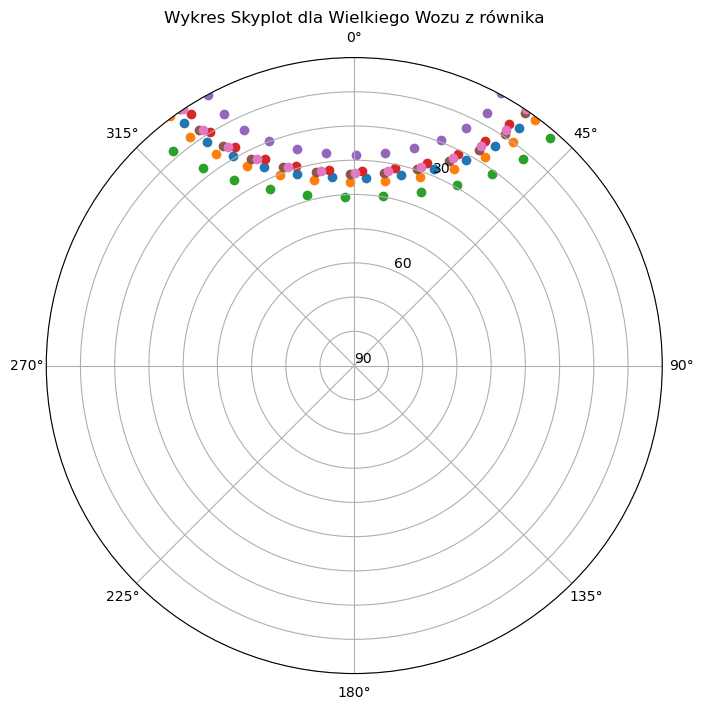

In [177]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10))                   # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

# narysowanie punktu na wykresie 
ax.scatter(azR1, 90-np.rad2deg(hR1))
ax.scatter(azR2, 90-np.rad2deg(hR2))
ax.scatter(azR3, 90-np.rad2deg(hR3))
ax.scatter(azR4, 90-np.rad2deg(hR4))
ax.scatter(azR5, 90-np.rad2deg(hR5))
ax.scatter(azR6, 90-np.rad2deg(hR6))
ax.scatter(azR7, 90-np.rad2deg(hR7))
plt.title('Wykres Skyplot dla Wielkiego Wozu z równika')